In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Tips Quick EDA.xlsx")

In [3]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0
6,8.77,2.00,Male,No,Sun,Dinner,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4.0
8,15.04,1.96,Male,No,Sun,Dinner,2.0
9,14.78,3.23,Male,No,Sun,Dinner,2.0


In [4]:
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,Male,No,Sat,Dinner,2.0
236,12.60,1.00,Male,Yes,Sat,Dinner,2.0
237,32.83,1.17,Male,Yes,Sat,Dinner,2.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,NaN,NaN,0.356557,0.618852,NaN,NaN,NaN


In [5]:
df.isnull().sum()

total_bill    1
tip           1
sex           0
smoker        0
day           1
time          1
size          1
dtype: int64

In [6]:
df.drop([244],inplace = True)

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 1.What is the overall average tip?


In [8]:
avg = df["tip"].mean()

In [9]:
print("the average of tip is : ",avg)

the average of tip is :  2.9982786885245902


# 2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?


In [10]:
df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


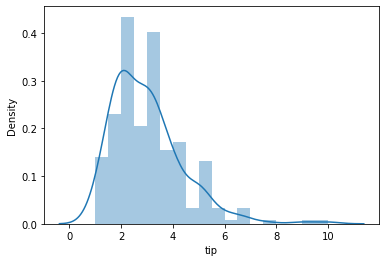

In [11]:
sns.distplot(df.tip)
plt.show()

## in the tip column there is no different between mean and meadian and no skwed in the field 

# 3.Prepare a boxplot for 'tip', are there any outliers?


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


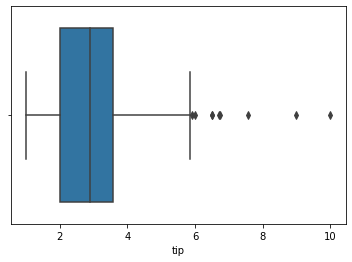

In [12]:
sns.boxplot(df.tip)
plt.show()

## outliers after 6

# 4.Prepare a boxplot for 'total_bill', are there any outliers?


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


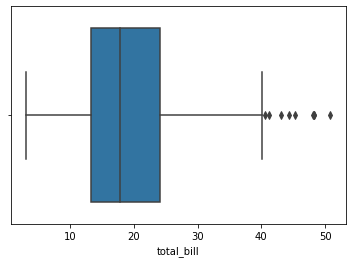

In [13]:
sns.boxplot(df.total_bill)
plt.show()

## outliers after 40

# 5.Gender: what is the percent of females in the data? 


In [14]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [15]:
df.sex.value_counts(normalize = True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

## average of female is 35%

# 6.Prepare a bar plot with the bars representing the percentage of records for each gender.

<AxesSubplot:>

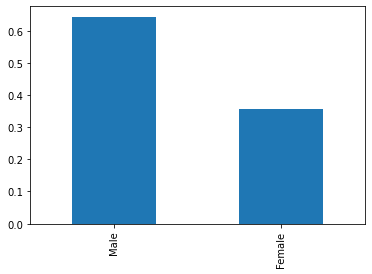

In [16]:
df.sex.value_counts(normalize = True).plot.bar()

# 7.Does the average tip differ by gender? Does one gender tip more than the other?



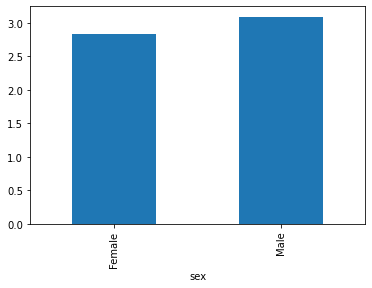

In [17]:
tip_sex= df.groupby('sex')['tip'].mean().plot.bar()

## yes,the average tip differ by gender ,male giving tips more then female

# 8.Does the average tip differ by the time of day?


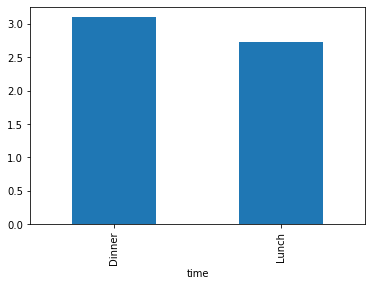

In [18]:
tip_time= df.groupby('time')['tip'].mean().plot.bar()

## yes, the average tip differ by the time of day,the lunch tip is more the dinner tip

# 9.Does the average tip differ by size (number of people at the table)? 


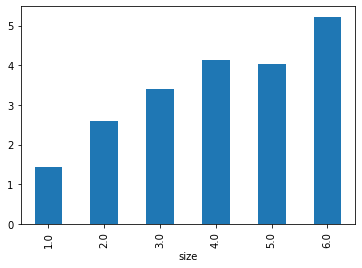

In [19]:
tip_size= df.groupby('size')['tip'].mean().plot.bar()

## yes,the average tip differ by size , the tip is increase as per no of people at the table

# 10.Do smokers tip more than non-smokers?


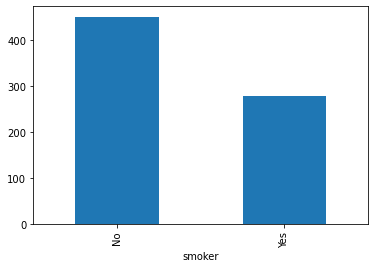

In [20]:
tip_smoker= df.groupby('smoker')['tip'].sum().plot.bar()

## NO,the non smoker tip is more then smoker

# 11.Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


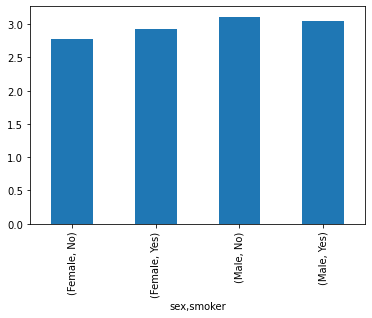

In [21]:
tip_smoker= df.groupby(["sex","smoker"])['tip'].mean().plot.bar()

## male,no group is more tip

# 12.Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.


In [22]:
pct_tip = df.tip/df.total_bill

In [23]:
df.insert(loc=7, column='pct_tip', value=pct_tip) # df['pct_tip'] = df['tip'] / df['total_bill']

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


# 13.Does pct_tip differ by gender? Does one gender tip more than the other?


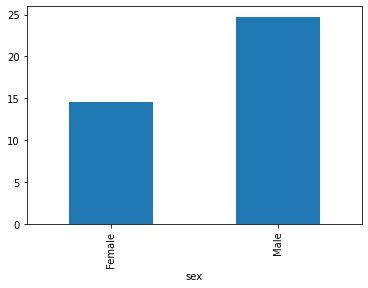

In [25]:
tip_gender1= df.groupby('sex')['pct_tip'].sum().plot.bar()

## male tip is more then female tip

# 14.Does pct_tip differ by size (number of people at the table)? 


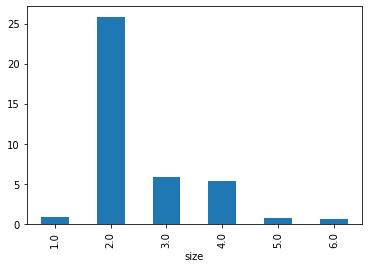

In [26]:
tip_size1= df.groupby('size')['pct_tip'].sum().plot.bar()

## number 2 size tip is more then other

# 15.Make the gender vs. smoker view using pct_tip  - does your inference change?


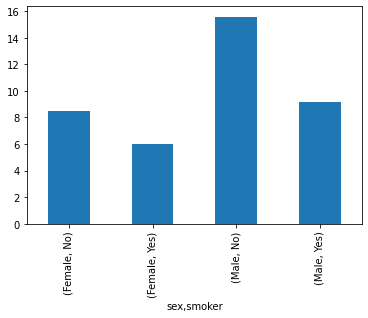

In [27]:
tip_smoker_gender = df.groupby(["sex","smoker"])['pct_tip'].sum().plot.bar()

## there is no change in our inference

# 16.Make a scatter plot of total_bill vs. tip.


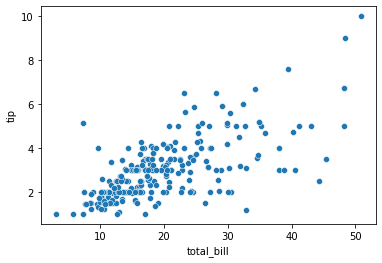

In [28]:
sns.scatterplot(x=df.total_bill,y=df.tip)
plt.show()

# 17.Make a scatter plot of total_bill vs. pct_tip.


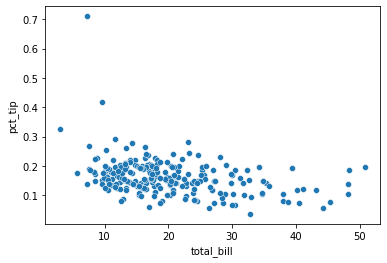

In [29]:
sns.scatterplot(x=df.total_bill,y=df.pct_tip)
plt.show()

# Thankyou